In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

## KE Probability

In [604]:
calc_NonL = [0.935203435243388,0.9589725071990134,0.9710677004745004,0.9755311188840788,0.9776688267754008]
MC_NonL = [0.9456083, 0.9637412, 0.9735877, 0.9768527, 0.97849727]

In [666]:
#calc_NonL = [];
#MC_NonL = [];
calc_resol = [];

In [2]:
file1 = uproot.open('./rootfiles/1MeV_onlyPrimarye-.root')
ElectronKE1 = file1['evt'].array('ElectronKE')
cont1, edge1 = np.histogram(ElectronKE1.flatten(), bins=800, range=(0,8));

file2 = uproot.open('./rootfiles/2MeV_onlyPrimarye-.root')
ElectronKE2 = file2['evt'].array('ElectronKE')
cont2, edge2 = np.histogram(ElectronKE2.flatten(), bins=800, range=(0,8));

file3 = uproot.open('./rootfiles/4MeV_onlyPrimarye-.root')
ElectronKE3 = file3['evt'].array('ElectronKE')
cont3, edge3 = np.histogram(ElectronKE3.flatten(), bins=800, range=(0,8));

file4 = uproot.open('./rootfiles/6MeV_onlyPrimarye-.root')
ElectronKE4 = file4['evt'].array('ElectronKE')
cont4, edge4 = np.histogram(ElectronKE4.flatten(), bins=800, range=(0,8));

file5 = uproot.open('./rootfiles/8MeV_onlyPrimarye-.root')
ElectronKE5 = file5['evt'].array('ElectronKE')
cont5, edge5 = np.histogram(ElectronKE5.flatten(), bins=800, range=(0,8));

In [3]:
center = []
for i in range(len(edge1)-1):
    center.append((edge1[i]+edge1[i+1])/2.)
    
Energy = np.arange(0.01,8,0.01)

In [5]:
MC_NonL_CON = [];
with open('../electron/MC_NonL.txt') as f:
    for lines in f.readlines():
        line = lines.strip('\n')
        MC_NonL_CON.append(float(line))
MC_NonL_CON = np.array(MC_NonL_CON)

In [297]:
len(MC_NonL)

799

In [6]:
Calc_NonL_CON = [];
with open('../electron/Calc_NonL.txt') as f:
    for lines in f.readlines():
        line = lines.strip('\n')
        Calc_NonL_CON.append(float(line))
Calc_NonL_CON = np.array(Calc_NonL_CON)

In [17]:

re_prob1 = [];
for i in range(len(center)-1):
    re_prob1.append((cont1[i]+cont1[i+1])/2.)
#re_prob1 = re_prob1 / (integral2(Energy, re_prob1) * ElectronKE1.shape[0] / ElectronKE1.flatten().shape[0])  #normalized    
re_prob1 = re_prob1 / (integral2(Energy, re_prob1) / 1)  #normalized    


re_prob2 = [];
for i in range(len(center)-1):
    re_prob2.append((cont2[i]+cont2[i+1])/2.)
#re_prob2 = re_prob2 / (integral2(Energy, re_prob2) * ElectronKE2.shape[0] / ElectronKE2.flatten().shape[0])  #normalized  
re_prob2 = re_prob2 / (integral2(Energy, re_prob2) / 2)  #normalized    


re_prob3 = [];
for i in range(len(center)-1):
    re_prob3.append((cont3[i]+cont3[i+1])/2.)
#re_prob3 = re_prob3 / (integral2(Energy, re_prob3) * ElectronKE3.shape[0] / ElectronKE3.flatten().shape[0])  #normalized    
re_prob3 = re_prob3 / (integral2(Energy, re_prob3) / 4)  #normalized    


re_prob4 = [];
for i in range(len(center)-1):
    re_prob4.append((cont4[i]+cont4[i+1])/2.)
#re_prob4 = re_prob4 / (integral2(Energy, re_prob4) * ElectronKE4.shape[0] / ElectronKE4.flatten().shape[0])  #normalized    
re_prob4 = re_prob4 / (integral2(Energy, re_prob4) / 6)  #normalized    

    
re_prob5 = [];
for i in range(len(center)-1):
    re_prob5.append((cont5[i]+cont5[i+1])/2.)
#re_prob5 = re_prob5 / (integral2(Energy, re_prob5) * ElectronKE5.shape[0] / ElectronKE5.flatten().shape[0])  #normalized    
re_prob5 = re_prob5 / (integral2(Energy, re_prob5) / 8)  #normalized    

    
    

In [18]:
## check Normalization
integral4_array = [];
integral4_array.append(integral4(Energy, re_prob1))
integral4_array.append(integral4(Energy, re_prob2))
integral4_array.append(integral4(Energy, re_prob3))
integral4_array.append(integral4(Energy, re_prob4))
integral4_array.append(integral4(Energy, re_prob5))
for i in range(5):
    print(integral4_array[i])

10.312170520871819
10.722728528183863
10.63765175484551
10.237588570342778
9.748412888775027


In [19]:
## check energy normalization
integral2_array = [];
integral2_array.append(integral2(Energy, re_prob1))
integral2_array.append(integral2(Energy, re_prob2))
integral2_array.append(integral2(Energy, re_prob3))
integral2_array.append(integral2(Energy, re_prob4))
integral2_array.append(integral2(Energy, re_prob5))
for i in range(5):
    print(integral2_array[i])

0.9999999999999997
2.0000000000000004
3.9999999999999973
6.0
8.00000000000001


In [20]:
## Evis calculation for gamma
integral1_array = [];
integral1_array.append(integral1(Energy, re_prob1, NonL_ratio))
integral1_array.append(integral1(Energy, re_prob2, NonL_ratio))
integral1_array.append(integral1(Energy, re_prob3, NonL_ratio))
integral1_array.append(integral1(Energy, re_prob4, NonL_ratio))
integral1_array.append(integral1(Energy, re_prob5, NonL_ratio))
for i in range(5):
    print(integral1_array[i])

0.9389389518073595
1.922719712436078
3.8973286957048896
5.873646648332254
7.850011149229273


In [742]:
integral4(Energy, re_prob)

18.00014000000001

In [314]:
MC_totnonl_vis1MeV = [];
MC_totnonl_vis1MeV.append(integral1(Energy, re_prob1,MC_NonL)/integral2(Energy,re_prob1))
MC_totnonl_vis1MeV.append(integral1(Energy, re_prob2, MC_NonL)/integral2(Energy,re_prob2))
MC_totnonl_vis1MeV.append(integral1(Energy,re_prob3, MC_NonL)/integral2(Energy,re_prob3))
MC_totnonl_vis1MeV.append(integral1(Energy,re_prob4, MC_NonL)/integral2(Energy,re_prob4))
MC_totnonl_vis1MeV.append(integral1(Energy,re_prob5, MC_NonL)/integral2(Energy,re_prob5))

In [315]:
calc_totnonl_vis1MeV = [];
calc_totnonl_vis1MeV.append(integral1(Energy, re_prob1, Calc_NonL)/integral2(Energy,re_prob1))
calc_totnonl_vis1MeV.append(integral1(Energy, re_prob2, Calc_NonL)/integral2(Energy,re_prob2))
calc_totnonl_vis1MeV.append(integral1(Energy,re_prob3, Calc_NonL)/integral2(Energy,re_prob3))
calc_totnonl_vis1MeV.append(integral1(Energy,re_prob4, Calc_NonL)/integral2(Energy,re_prob4))
calc_totnonl_vis1MeV.append(integral1(Energy,re_prob5, Calc_NonL)/integral2(Energy,re_prob5))

In [45]:
MC_totnonl_vis1MeV

[0.934207368157405,
 0.9485017063052905,
 0.9567229869420725,
 0.9595866987170473,
 0.9610081849650314]

In [26]:
# read sigma_scint from simulation text file
scint_sigmapart = [];  Evis1 = []; scint_pe = [];
with open('../electron/Cerenkov/quench_smearing.txt') as f:
    for lines in f.readlines():
        line  = lines.strip('\n')
        data = line.split(' ')
        scint_pe.append(float(data[1])) 
        scint_sigmapart.append(float(data[2])/float(data[1]))

for i in range(len(scint_pe)):
    Evis1.append(scint_pe[i]/1481.06*1.)
    scint_sigmapart[i] = scint_sigmapart[i]*Evis1[i]

In [27]:
# read sigma_scint from simulation text file
tot_sigmapart = [];  Evis2 = []; tot_pe = [];
with open('../electron/Cerenkov/totPE_smearing.txt') as f:
    for lines in f.readlines():
        line  = lines.strip('\n')
        data = line.split(' ')
        tot_pe.append(float(data[1]))
        tot_sigmapart.append(float(data[2])/float(data[1]))
for i in range(len(tot_pe)):
    Evis2.append(tot_pe[i]/1481.06*1.)
    tot_sigmapart[i] = tot_sigmapart[i]*Evis2[i]

Text(0, 0.5, 'relative difference')

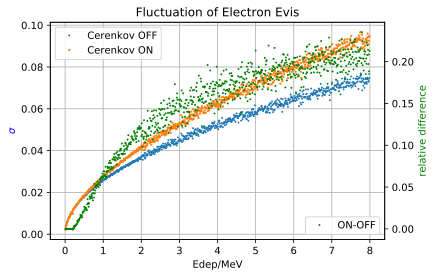

In [419]:
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.plot(Energy, np.array(scint_sigmapart), 'o',ms=1, label='Cerenkov OFF')
ax1.plot(Energy, tot_sigmapart, 's',ms=1, label='Cerenkov ON')
ax1.set_ylabel('$\sigma$', color='blue')
ax1.yaxis.label.set_color('blue')
ax1.set_xlabel('Edep/MeV')
ax1.set_title('Fluctuation of Electron Evis')
plt.grid(True)
plt.legend()
#plt.semilogy()
#plt.semilogx()

ax2 = ax1.twinx()
ax2.plot(Energy, (np.array(tot_sigmapart)-np.array(scint_sigmapart))/np.array(tot_sigmapart), 'o',ms=1, color='green',
         label='ON-OFF')
ax2.legend(loc='lower right')
ax2.set_ylabel('relative difference', color='green')

## Cerenkov OFF

In [24]:
calc_resol_vis1MeV_COFF_abc = [];
calc_resol_vis1MeV_COFF_abc.append(np.sqrt(integral3(Energy, re_prob1, crosspart))/integral1(Energy,re_prob1, NonL_ratio))
calc_resol_vis1MeV_COFF_abc.append(np.sqrt(integral3(Energy, re_prob2, crosspart))/integral1(Energy,re_prob2, NonL_ratio))
calc_resol_vis1MeV_COFF_abc.append(np.sqrt(integral3(Energy, re_prob3, crosspart))/integral1(Energy,re_prob3, NonL_ratio))
calc_resol_vis1MeV_COFF_abc.append(np.sqrt(integral3(Energy, re_prob4, crosspart))/integral1(Energy,re_prob4, NonL_ratio))
calc_resol_vis1MeV_COFF_abc.append(np.sqrt(integral3(Energy, re_prob5, crosspart))/integral1(Energy,re_prob5, NonL_ratio))

In [28]:
calc_resol_vis1MeV_COFF_MC = [];
calc_resol_vis1MeV_COFF_MC.append(np.sqrt(integral3(Energy, re_prob1, scint_sigmapart))/integral1(Energy,re_prob1, NonL_ratio))
calc_resol_vis1MeV_COFF_MC.append(np.sqrt(integral3(Energy, re_prob2, scint_sigmapart))/integral1(Energy,re_prob2, NonL_ratio))
calc_resol_vis1MeV_COFF_MC.append(np.sqrt(integral3(Energy, re_prob3, scint_sigmapart))/integral1(Energy,re_prob3, NonL_ratio))
calc_resol_vis1MeV_COFF_MC.append(np.sqrt(integral3(Energy, re_prob4, scint_sigmapart))/integral1(Energy,re_prob4, NonL_ratio))
calc_resol_vis1MeV_COFF_MC.append(np.sqrt(integral3(Energy, re_prob5, scint_sigmapart))/integral1(Energy,re_prob5, NonL_ratio))

In [779]:
calc_resol_vis8MeV = [];
calc_resol_vis8MeV.append(np.sqrt(integral3(Energy, re_prob1,crosspart))/integral1(Energy,re_prob1, NonL_ratio))
calc_resol_vis8MeV.append(np.sqrt(integral3(Energy, re_prob2,crosspart))/integral1(Energy,re_prob2, NonL_ratio))
calc_resol_vis8MeV.append(np.sqrt(integral3(Energy, re_prob3,crosspart))/integral1(Energy,re_prob3, NonL_ratio))
calc_resol_vis8MeV.append(np.sqrt(integral3(Energy, re_prob4,crosspart))/integral1(Energy,re_prob4, NonL_ratio))
calc_resol_vis8MeV.append(np.sqrt(integral3(Energy, re_prob5,crosspart))/integral1(Energy,re_prob5, NonL_ratio))

In [408]:
## step by step check:
itgl3_COFF_MC = [];
itgl3_COFF_MC.append(np.sqrt(integral3(Energy, re_prob1, scint_sigmapart)))
itgl3_COFF_MC.append(np.sqrt(integral3(Energy, re_prob2, scint_sigmapart)))
itgl3_COFF_MC.append(np.sqrt(integral3(Energy, re_prob3, scint_sigmapart)))
itgl3_COFF_MC.append(np.sqrt(integral3(Energy, re_prob4, scint_sigmapart)))
itgl3_COFF_MC.append(np.sqrt(integral3(Energy, re_prob5, scint_sigmapart)))


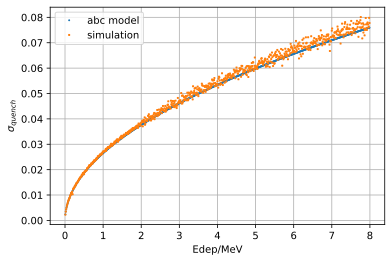

In [318]:
plt.plot(Energy, crosspart, 'o', ms=1, label='abc model')
plt.plot(Energy, scint_sigmapart, 's', ms=1, label='simulation')
plt.grid(True)
plt.xlabel('Edep/MeV')
plt.ylabel('$\sigma_{quench}$')
plt.legend()

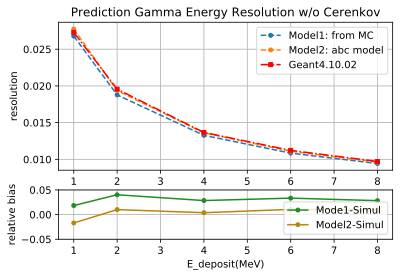

In [30]:

## Old electron probability
# Draw totalPE comparison:
from pylab import *
from matplotlib import gridspec 
gs = gridspec.GridSpec(2,1,height_ratios=[3,1]) 

Edep = [1,2,4,6,8];
MC_resol = [0.02729, 0.01956, 0.01366, 0.01122, 0.00971]  # w/o Cerenkov
#calc_resol = [0.0812, 0.0598, 0.0427, 0.0344, 0.0292]
scale_resol = []; 
#for i in range(5):
#    scale_resol.append(calc_resol_correct_calc[i]*MC_resol[0]/calc_resol_correct_calc[0])


ax0 = plt.subplot(gs[0])
ax0.plot(Edep, calc_resol_vis1MeV_COFF_MC,'o--',label='Model1: from MC', ms=4)
ax0.plot(Edep, calc_resol_vis1MeV_COFF_abc,'o--',label='Model2: abc model', ms=4)
ax0.plot(Edep,MC_resol, 's-.', label='Geant4.10.02', ms=4, color='red')
ax0.legend()
#plt.text(1.9,0.025,"Scale to 1MeV", fontsize=13, color='darkviolet')
#plt.arrow(1.1,0.0276,0.65,-0.0015,color='darkviolet', width=0.0002,head_length=0.05)
plt.grid(True)
plt.ylabel('resolution')
plt.title("Prediction Gamma Energy Resolution w/o Cerenkov")

ax1 = plt.subplot(gs[1])
ax1.plot(Edep, (np.array(MC_resol)-np.array(calc_resol_vis1MeV_COFF_MC))/np.array(MC_resol), 'o-',ms=4, color='forestgreen', label='Mode1-Simul')
ax1.plot(Edep, (np.array(MC_resol)-np.array(calc_resol_vis1MeV_COFF_abc))/np.array(MC_resol), 'o-', ms=4,color='darkgoldenrod', label='Model2-Simul')
plt.grid(True)
#plt.yticks(np.arange(0, 1200, step=400))
plt.xlabel('E_deposit(MeV)')
plt.ylabel('relative bias')
plt.ylim(-0.05,0.05)
plt.legend(loc='lower right')

#plt.savefig('compare_totalPE_electron.svg')

## Cerenkov ON

In [31]:
calc_resol_vis1MeV_CON_MC = [];
calc_resol_vis1MeV_CON_MC.append(np.sqrt(integral3(Energy, re_prob1, tot_sigmapart))/integral1(Energy,re_prob1, Calc_NonL_CON))
calc_resol_vis1MeV_CON_MC.append(np.sqrt(integral3(Energy, re_prob2, tot_sigmapart))/integral1(Energy,re_prob2, Calc_NonL_CON))
calc_resol_vis1MeV_CON_MC.append(np.sqrt(integral3(Energy, re_prob3, tot_sigmapart))/integral1(Energy,re_prob3, Calc_NonL_CON))
calc_resol_vis1MeV_CON_MC.append(np.sqrt(integral3(Energy, re_prob4, tot_sigmapart))/integral1(Energy,re_prob4, Calc_NonL_CON))
calc_resol_vis1MeV_CON_MC.append(np.sqrt(integral3(Energy, re_prob5, tot_sigmapart))/integral1(Energy,re_prob5, Calc_NonL_CON))

In [36]:
calc_resol_vis1MeV_CON_abc = [];
calc_resol_vis1MeV_CON_abc.append(np.sqrt(integral3(Energy, re_prob1, sigma_abc_CON))/integral1(Energy,re_prob1, Calc_NonL_CON))
calc_resol_vis1MeV_CON_abc.append(np.sqrt(integral3(Energy, re_prob2, sigma_abc_CON))/integral1(Energy,re_prob2, Calc_NonL_CON))
calc_resol_vis1MeV_CON_abc.append(np.sqrt(integral3(Energy, re_prob3, sigma_abc_CON))/integral1(Energy,re_prob3, Calc_NonL_CON))
calc_resol_vis1MeV_CON_abc.append(np.sqrt(integral3(Energy, re_prob4, sigma_abc_CON))/integral1(Energy,re_prob4, Calc_NonL_CON))
calc_resol_vis1MeV_CON_abc.append(np.sqrt(integral3(Energy, re_prob5, sigma_abc_CON))/integral1(Energy,re_prob5, Calc_NonL_CON))

In [407]:
## step by step check
itgl3_CON_MC = [];
itgl3_CON_MC.append(np.sqrt(integral3(Energy, re_prob1, tot_sigmapart)))
itgl3_CON_MC.append(np.sqrt(integral3(Energy, re_prob2, tot_sigmapart)))
itgl3_CON_MC.append(np.sqrt(integral3(Energy, re_prob3, tot_sigmapart)))
itgl3_CON_MC.append(np.sqrt(integral3(Energy, re_prob4, tot_sigmapart)))
itgl3_CON_MC.append(np.sqrt(integral3(Energy, re_prob5, tot_sigmapart)))

Text(0.5, 1.0, 'Prediction Gamma Energy Fluctuation')

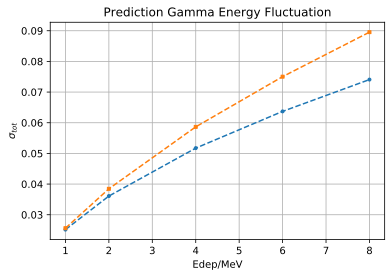

In [415]:
plt.plot(Edep, itgl3_COFF_MC, 'o--', ms=3, label='Cerenkov OFF')
plt.plot(Edep, itgl3_CON_MC, 's--', ms=3, label='Cerenkov ON')
ax0.legend()
plt.grid(True)
plt.xlabel('Edep/MeV')
plt.ylabel('$\sigma_{tot}$')
plt.title("Prediction Gamma Energy Fluctuation")

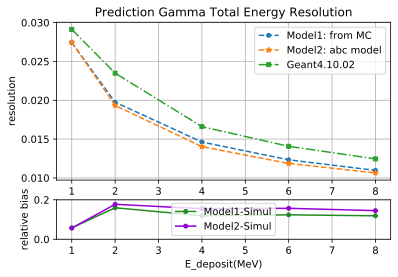

In [37]:

## Old electron probability
# Draw totalPE comparison:
from pylab import *
from matplotlib import gridspec 
gs = gridspec.GridSpec(2,1,height_ratios=[4,1]) 

Edep = [1,2,4,6,8];
#MC_resol = [0.02729, 0.01956, 0.01366, 0.01122, 0.00971]  # w/o Cerenkov
MC_resol = [0.02912, 0.02349, 0.01660, 0.01407, 0.01245]  # w/ Cerenkov


ax0 = plt.subplot(gs[0])
ax0.plot(Edep, calc_resol_vis1MeV_CON_MC,'o--',label='Model1: from MC', ms=4)
ax0.plot(Edep, calc_resol_vis1MeV_CON_abc,'*--',label='Model2: abc model', ms=6)
ax0.plot(Edep,MC_resol, 's-.', label='Geant4.10.02', ms=4)
ax0.legend()
#plt.text(1.9,0.025,"Scale to 1MeV", fontsize=13, color='darkviolet')
#plt.arrow(1.1,0.0276,0.65,-0.0015,color='darkviolet', width=0.0002,head_length=0.05)
plt.grid(True)
plt.ylabel('resolution')
plt.title("Prediction Gamma Total Energy Resolution")

ax1 = plt.subplot(gs[1])
ax1.plot(Edep, (np.array(MC_resol)-np.array(calc_resol_vis1MeV_CON_MC))/np.array(MC_resol), 'o-', ms=4, color='forestgreen',
        label='Model1-Simul')
ax1.plot(Edep, (np.array(MC_resol)-np.array(calc_resol_vis1MeV_CON_abc))/np.array(MC_resol), 'o-', ms=4, color='darkviolet',
        label='Model2-Simul')
plt.grid(True)
#plt.yticks(np.arange(0, 1200, step=400))
plt.xlabel('E_deposit(MeV)')
plt.ylabel('relative bias')
plt.ylim(-0.0,0.20)
plt.legend(loc='center')

#plt.savefig('compare_totalPE_electron.svg')

In [35]:
## use adc model to fit:
def abc_CON(x):
    return np.sqrt(0.026**2/x+0.00686**2)
Evis_abc_CON = Energy*MC_NonL_CON
sigma_abc_CON = Evis_abc_CON * abc_CON(Evis_abc_CON)
#plt.plot(Energy, sigma_MC_CON, 'o', ms=1, label='abc model')
#plt.plot(Energy, tot_sigmapart, 's', ms=1, label='simulation')
#plt.grid(True)
#plt.xlabel('Edep/MeV')
#plt.ylabel('$\sigma$')
#plt.legend()

In [305]:
calc_resol_vis1MeV_CON_abc = [];
calc_resol_vis1MeV_CON_abc.append(np.sqrt(integral3(Energy, re_prob1, sigma_MC_CON))/integral1(Energy,re_prob1, Calc_NonL_CON))
calc_resol_vis1MeV_CON_abc.append(np.sqrt(integral3(Energy, re_prob2, sigma_MC_CON))/integral1(Energy,re_prob2, Calc_NonL_CON))
calc_resol_vis1MeV_CON_abc.append(np.sqrt(integral3(Energy, re_prob3, sigma_MC_CON))/integral1(Energy,re_prob3, Calc_NonL_CON))
calc_resol_vis1MeV_CON_abc.append(np.sqrt(integral3(Energy, re_prob4, sigma_MC_CON))/integral1(Energy,re_prob4, Calc_NonL_CON))
calc_resol_vis1MeV_CON_abc.append(np.sqrt(integral3(Energy, re_prob5, sigma_MC_CON))/integral1(Energy,re_prob5, Calc_NonL_CON))

Text(0, 0.5, 'relative bias')

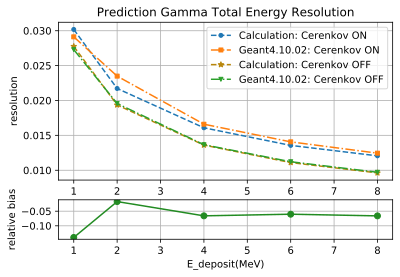

In [413]:

## Old electron probability
# Draw totalPE comparison:
from pylab import *
from matplotlib import gridspec 
gs = gridspec.GridSpec(2,1,height_ratios=[4,1]) 

Edep = [1,2,4,6,8];
MC_resol_COFF = [0.02729, 0.01956, 0.01366, 0.01122, 0.00971]  # w/o Cerenkov
MC_resol_CON = [0.02912, 0.02349, 0.01660, 0.01407, 0.01245]  # w/ Cerenkov

scale = 1.1

ax0 = plt.subplot(gs[0])
ax0.plot(Edep, np.array(calc_resol_vis1MeV_CON_MC)*scale,'o--',label='Calculation: Cerenkov ON', ms=4)
ax0.plot(Edep,MC_resol_CON, 's-.', label='Geant4.10.02: Cerenkov ON', ms=4)
ax0.plot(Edep, np.array(calc_resol_vis1MeV_COFF), '*--', ms=6, label='Calculation: Cerenkov OFF', color='darkgoldenrod')
ax0.plot(Edep,MC_resol_COFF, 'v-.', label='Geant4.10.02: Cerenkov OFF', ms=4)
ax0.legend()
#plt.text(1.9,0.025,"Scale to 1MeV", fontsize=13, color='darkviolet')
#plt.arrow(1.1,0.0276,0.65,-0.0015,color='darkviolet', width=0.0002,head_length=0.05)
plt.grid(True)
plt.ylabel('resolution')
plt.title("Prediction Gamma Total Energy Resolution")

ax1 = plt.subplot(gs[1])
ax1.plot(Edep, (np.array(MC_resol)-scale*np.array(calc_resol_vis1MeV_CON_MC)*scale)/np.array(MC_resol), 'o-', color='forestgreen')
plt.grid(True)
#plt.yticks(np.arange(0, 1200, step=400))
plt.xlabel('E_deposit(MeV)')
plt.ylabel('relative bias')
#plt.ylim(-0.15,0.1)
#plt.legend(loc='upper left')

#plt.savefig('compare_totalPE_electron.svg')

In [290]:
plt.legend?

In [780]:
calc_resol_vis8MeV

[0.02685538409267744,
 0.01895416658115371,
 0.013407687188899585,
 0.010963369759265786,
 0.00951140847070645]

Text(0.5, 1.0, 'e+- kinetic energy generated by 8MeV gamma')

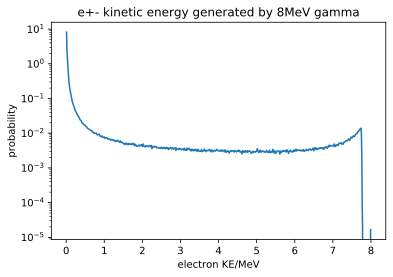

In [754]:
plt.plot(Energy, re_prob5, '-', ms=1)
plt.semilogy()
plt.xlabel('electron KE/MeV')
plt.ylabel('probability')
plt.title('e+- kinetic energy generated by 8MeV gamma')

In [607]:
calc_resol_correct_calc = calc_resol / np.array(calc_NonL)

In [608]:
calc_resol_correct_MC = calc_resol / np.array(MC_NonL)

## NonLinearity

In [8]:
def funcNL(p1,p2,dEdx):
    return 1/(1+p1*dEdx+p2*dEdx**2)

def numerical_integral(a,b,Emax):
    sum = 0;
    if(len(a) != len(b)):
        print('Two array have different length!')
        return sum
    for i in range(len(a)-1):
        if(a[i+1]<=round(Emax,2)):
            area =(b[i]+b[i+1])*(a[i+1]-a[i])/2.
            sum = sum + area
            #print('area : ' + str(area) + ' edep: '+str(b[i]) + '  factor: ' +str(a[i]) )
    return sum

In [9]:
kB1 = 6.5e-3; kB2 = 1.5e-6;
Edep = []; spow = [];
with open('./StopPow1.txt') as f:
    for lines in f.readlines():
        line = lines.strip('\n')
        data = line.split(' ')
        Edep.append(float(data[0]))
        spow.append(float(data[1]))
NonL_factor = [funcNL(kB1, kB2, i) for i in spow]

In [198]:
len(Edep)

856

In [10]:

Energy = [];
for i in range(799):
    Energy.append(0.01*i+0.01)


In [11]:
Escint = [] ; ratio = [];
for i in range(len(Energy)):
    Escint.append(numerical_integral(Edep,NonL_factor,Energy[i]))
    ratio.append(Escint[i]/Energy[i])

In [12]:
NonL_ratio = np.array(Escint)/np.array(Energy)

In [202]:
len(NonL_ratio)

799

Text(0.5, 1.0, 'Nonlinearity by Quenching')

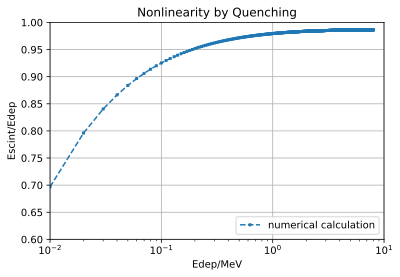

In [203]:
plt.plot(Energy, np.array(Escint)/np.array(Energy),'s--', ms=2, label='numerical calculation')
#plt.plot(Edep1, np.array(Escint1)/np.array(Edep1),'o--', ms=2, label='Geant4.10.4 default cut')
plt.xlabel('Edep/MeV')
plt.ylabel('Escint/Edep')
plt.xlim(0.01,10)
plt.ylim(0.6,1)
plt.semilogx()
plt.legend(loc='lower right')
plt.grid()
plt.title('Nonlinearity by Quenching')

In [313]:
## numerator integral
len(Energy)

799

In [347]:
len(re_prob)

799

In [374]:
calc_NonL.append(integral1(Energy, cont/sum_cont, NonL_ratio) / integral2(Energy, cont/sum_cont))

In [375]:
calc_NonL

[0.9323184300072725,
 0.9572568635278356,
 0.9721231429231496,
 0.9775005248460498,
 0.9802276800494615]

In [13]:
## integral
def integral1(Energy, re_prob, NonL_ratio):
    sum = 0;
    if(len(Energy)!=len(re_prob) or len(Energy)!=len(NonL_ratio) or len(re_prob)!=len(NonL_ratio)):
        print('array length different!!!')
        return 0;
    for i in range(len(Energy)-1):
        tmp1 = Energy[i]*re_prob[i]*NonL_ratio[i]
        tmp2 = Energy[i+1]*re_prob[i+1]*NonL_ratio[i+1]
        area = (tmp1+tmp2)*(Energy[i+1]-Energy[i])*100/2.
        sum += area
    return sum

In [99]:
integral1(Energy, re_prob, NonL_ratio/sum)

0.004727136441117823

In [14]:
## denominator integral
def integral2(Energy, re_prob):
    sum = 0;
    if(len(Energy)!=len(re_prob)):
        print('array length different!!!')
        return 0;
    for i in range(len(Energy)-1):
        tmp1 = Energy[i]*re_prob[i]
        tmp2 = Energy[i+1]*re_prob[i+1]
        area = (tmp1+tmp2)*(Energy[i+1]-Energy[i])*100/2.
        #print(tmp1+tmp2,end=',')
        sum += area
    return sum

In [15]:
##
def integral3(Energy, re_prob, sigma):
    sum = 0;
    if(len(Energy)!=len(re_prob) or len(Energy)!=len(sigma) or len(re_prob)!=len(sigma)):
        print('array length different!!!')
        return 0;
    for i in range(len(Energy)-1):
        tmp1 = re_prob[i]*sigma[i]*sigma[i]
        tmp2 = re_prob[i+1]*sigma[i+1]*sigma[i+1]
        area = (tmp1+tmp2)*(Energy[i+1]-Energy[i])*100/2.
        #print(tmp1+tmp2,end=',')
        sum += area
    return sum

In [16]:
## Normalized integral
def integral4(Energy, re_prob):
    sum = 0;
    if(len(Energy)!=len(re_prob)):
        print('array length different!!!')
        return 0;
    for i in range(len(Energy)-1):
        tmp1 = re_prob[i]
        tmp2 = re_prob[i+1]
        area = (tmp1+tmp2)*(Energy[i+1]-Energy[i])*100/2.
        sum += area
    return sum

In [81]:
calc_NonL

[0.9387857564813342,
 0.961092601323839,
 0.9739929758750402,
 0.978659664727719,
 0.9810503839600031]

In [40]:
qedep = file['prmtrkdep'].array('Qedep')
edep = file['prmtrkdep'].array('edep')
mean_edep = edep.flatten().mean()
mean_qedep = qedep.flatten().mean()
MC_NonL.append(mean_qedep/mean_edep)

KeyError: not found: b'prmtrkdep' with cycle 1
 in file: ./rootfiles/2MeV_onlyPrimarye-.root

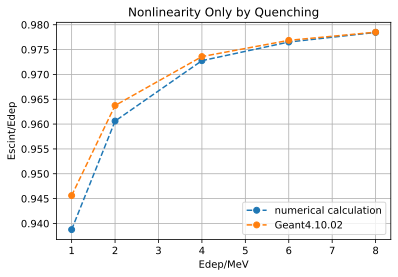

In [344]:
E = [1,2,4,6,8]
calc = [0.9387606436224892,0.9606063566455755, 0.9727627293492151, 0.9765143830753805, 0.9784496951940815]
simul = [0.9456083, 0.9637412, 0.9735877, 0.9768527, 0.97849727]
plt.plot(E, calc, 'o--', label='numerical calculation')
plt.plot(E, simul, 'o--', label='Geant4.10.02')
plt.legend()
plt.xlabel('Edep/MeV')
plt.ylabel('Escint/Edep')
plt.title('Nonlinearity Only by Quenching')
plt.grid()

(-0.001, 0.009)

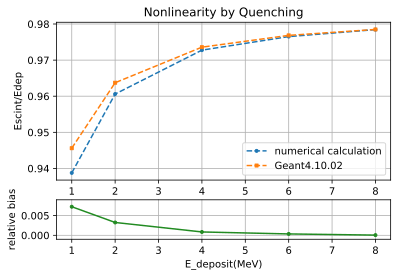

In [345]:
# Draw totalPE comparison:
from pylab import *
from matplotlib import gridspec 
gs = gridspec.GridSpec(2,1,height_ratios=[4,1]) 

E = [1,2,4,6,8]

ax0 = plt.subplot(gs[0])
ax0.plot(E,calc,'o--',label='numerical calculation', ms=3)
ax0.plot(E,simul, 's--', label='Geant4.10.02', ms=3)
ax0.legend()
plt.grid(True)
plt.ylabel('Escint/Edep')
plt.title('Nonlinearity by Quenching')

ax1 = plt.subplot(gs[1])
ax1.plot(E, (np.array(simul)-np.array(calc))/np.array(simul), 'o-', color='forestgreen', ms=3)
plt.grid(True)
#plt.yticks(np.arange(0, 1200, step=400))
plt.xlabel('E_deposit(MeV)')
plt.ylabel('relative bias')
plt.ylim(-0.001, 0.009)
#plt.legend(loc='upper left')

#plt.savefig('compare_totalPE_electron.svg')

(-0.005, 0.02)

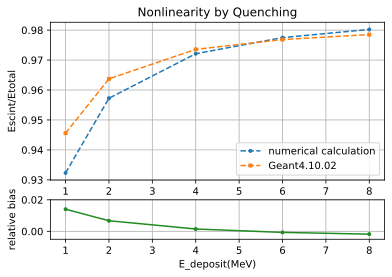

In [379]:
## New electron probability
# Draw totalPE comparison:
from pylab import *
from matplotlib import gridspec 
gs = gridspec.GridSpec(2,1,height_ratios=[4,1]) 

Etotal = [1,2,4,6,8];
MC_NonL = [0.945592, 0.9637304, 0.97357273, 0.9768572, 0.978502]

ax0 = plt.subplot(gs[0])
ax0.plot(Etotal,calc_NonL,'o--',label='numerical calculation', ms=3)
ax0.plot(Etotal,MC_NonL, 's--', label='Geant4.10.02', ms=3)
ax0.legend()
plt.grid(True)
plt.ylabel('Escint/Etotal')
plt.title('Nonlinearity by Quenching')

ax1 = plt.subplot(gs[1])
ax1.plot(Etotal, (np.array(MC_NonL)-np.array(calc_NonL))/np.array(MC_NonL), 'o-', ms=3,color='forestgreen')
plt.grid(True)
#plt.yticks(np.arange(0, 1200, step=400))
plt.xlabel('E_deposit(MeV)')
plt.ylabel('relative bias')
plt.ylim(-0.005, 0.02)
#plt.legend(loc='upper left')

#plt.savefig('compare_totalPE_electron.svg')

In [163]:
calc_NonL

[0.9390067074192047,
 0.9594908137016659,
 0.9725802196579371,
 0.9778180643571491,
 0.9804441027468905]

In [164]:
MC_NonL 

[0.945592, 0.9637304, 0.97357273, 0.9768572, 0.978502]

In [243]:
calc_NonL1

[0.935203435243388,
 0.9589725071990134,
 0.9710677004745004,
 0.9755311188840788,
 0.9776688267754008]

In [27]:
MC_NonL1 = [0.945592, 0.9637304, 0.97357273, 0.9768572, 0.978502]

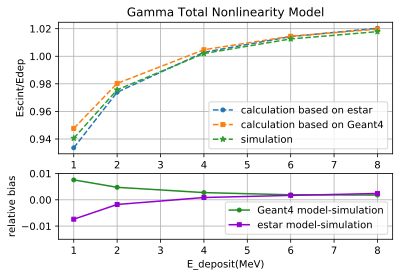

In [316]:
## Old electron probability
# Draw totalPE comparison:
from pylab import *
from matplotlib import gridspec 
gs = gridspec.GridSpec(2,1,height_ratios=[2,1]) 

Edep = [1,2,4,6,8];
totalPE = [1393, 2890, 5936, 8998, 12060]
scale = 1.; #MC_totnonl_vis1MeV[0]/(totalPE[0]/Edep[0]/A);
totalPE_nonl = [];
A = 1481.06
for i in range(5):
    totalPE_nonl.append(totalPE[i]/Edep[i]/A*scale)

ax0 = plt.subplot(gs[0])
#ax0.plot(Edep,calc_NonL1,'o--',label='numerical calculation', ms=3)
ax0.plot([1,2,4,6,8], calc_totnonl_vis1MeV, 'o--', label='calculation based on estar', ms=4)
ax0.plot([1,2,4,6,8], MC_totnonl_vis1MeV, 's--', label='calculation based on Geant4', ms=4)
ax0.plot([1,2,4,6,8],totalPE_nonl, '*--', label='simulation', ms=6)
#ax0.plot([1,2,4],np.array(totalPE)/np.array([1,2,4])/1481.06*scale, 's--', label='Geant4.10.02', ms=3)
ax0.legend(loc='lower right')
#plt.ylim(0.9,1.05)
plt.grid(True)
plt.ylabel('Escint/Edep')
plt.title('Gamma Total Nonlinearity Model')

ax1 = plt.subplot(gs[1])
ax1.plot(Edep, (np.array(MC_totnonl_vis1MeV)-np.array(totalPE_nonl))/np.array(totalPE_nonl), 'o-', ms=4, color='forestgreen', label='Geant4 model-simulation')
ax1.plot(Edep, (np.array(calc_totnonl_vis1MeV)-np.array(totalPE_nonl))/np.array(totalPE_nonl), 's-', ms=4, color='darkviolet', label='estar model-simulation')
plt.grid(True)
#plt.yticks(np.arange(0, 1200, step=400))
plt.xlabel('E_deposit(MeV)')
plt.ylabel('relative bias')
plt.ylim(-0.015,0.010)
ax1.legend(loc='lower right')

#plt.savefig('compare_totalPE_electron.svg')

## Energy Fluctuation

In [22]:
def abcmodel(x):
    return np.sqrt(0.02674**2/x+0.00145**2+0.00082**2/x/x)  #normalized @1MeV
    #return np.sqrt(0.02668**2/x+0.00145**2+0.00082**2/x/x)  #normalized @8MeV

In [23]:
EE = np.array(Escint)
resol = abcmodel(EE)
crosspart = Energy*NonL_ratio*resol

ValueError: x and y must have same first dimension, but have shapes (799,) and (1,)

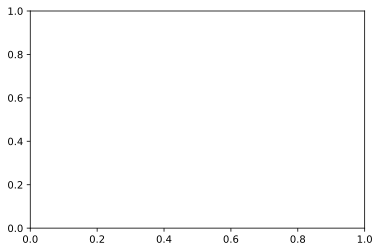

In [319]:
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.plot(Energy, cross, '-', color='darkviolet')
ax1.set_ylabel('sigma(E)/MeV', color='darkviolet')
ax1.yaxis.label.set_color('darkviolet')
ax1.set_xlabel('Edep/MeV')
plt.grid(True)

ax2 = ax1.twinx()
ax2.plot(Energy, cross/Energy, '-', color='green')
ax2.set_ylabel('resolution(Edep)', color='green')

Text(0, 0.5, 'relative bias')

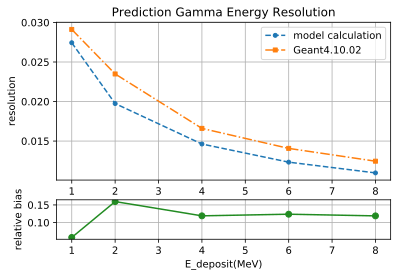

In [248]:

## Old electron probability
# Draw totalPE comparison:
from pylab import *
from matplotlib import gridspec 
gs = gridspec.GridSpec(2,1,height_ratios=[4,1]) 

Edep = [1,2,4,6,8];
MC_resol = [0.02912, 0.02349, 0.01660, 0.01407, 0.01245]  # w/ Cerenkov
#calc_resol = [0.0812, 0.0598, 0.0427, 0.0344, 0.0292]
scale_resol = []; 
#for i in range(5):
#    scale_resol.append(calc_resol_correct_calc[i]*MC_resol[0]/calc_resol_correct_calc[0])


ax0 = plt.subplot(gs[0])
ax0.plot(Edep, calc_resol_vis1MeV,'o--',label='model calculation', ms=4)
ax0.plot(Edep,MC_resol, 's-.', label='Geant4.10.02', ms=4)
ax0.legend()
#plt.text(1.9,0.025,"Scale to 1MeV", fontsize=13, color='darkviolet')
#plt.arrow(1.1,0.0276,0.65,-0.0015,color='darkviolet', width=0.0002,head_length=0.05)
plt.grid(True)
plt.ylabel('resolution')
plt.title("Prediction Gamma Energy Resolution")

ax1 = plt.subplot(gs[1])
ax1.plot(Edep, (np.array(MC_resol)-np.array(calc_resol_vis1MeV))/np.array(MC_resol), 'o-', color='forestgreen')
plt.grid(True)
#plt.yticks(np.arange(0, 1200, step=400))
plt.xlabel('E_deposit(MeV)')
plt.ylabel('relative bias')
#plt.ylim(-0.03,0.02)
#plt.legend(loc='upper left')

#plt.savefig('compare_totalPE_electron.svg')

In [179]:
MC_resol = [0.02729, 0.01956, 0.01366, 0.01122, 0.00971]

In [220]:
sum

0.7121320173041005

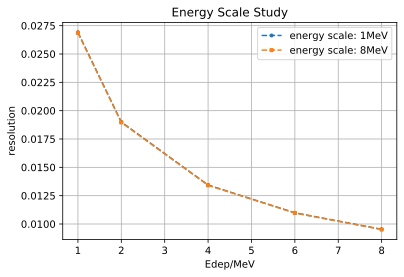

In [793]:
Edep = [1,2,4,6,8];
Evis1MeV = []; Evis8MeV = [];
scale1MeV = []; scale8MeV = [];
for i in range(5):
    scale1MeV.append(MC_NonL[i]/MC_NonL[0])
    scale8MeV.append(MC_NonL[i]/MC_NonL[4])


plt.plot(np.array(Edep), calc_resol_vis1MeV, 'o--',ms=3,label='energy scale: 1MeV')
plt.plot(np.array(Edep), calc_resol_vis8MeV, 's--',ms=3,label='energy scale: 8MeV')
plt.legend()
plt.xlabel('Edep/MeV')
plt.ylabel("resolution")
plt.title('Energy Scale Study')
plt.grid(True)